<a href="https://colab.research.google.com/github/potuu/Implementation_of_A_Domain_Generative_Graph_Network_for_EEG_Based_Emotion_Recognition/blob/main/1DCNNforEEGforDREAMERDATASET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
import os
import pandas as pd
import numpy as np
from scipy.signal import butter, filtfilt
import numpy as np
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [89]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [90]:
data= "/content/drive/MyDrive/DREAMER"

In [91]:
import pandas as pd

# CSV dosyasını yükle
df_eeg = pd.read_csv('/content/drive/MyDrive/DREAMER/DREAMER_Extracted_EEG.csv')

# Satır ve sütun sayısını yazdır
print(f"Satır sayısı: {df.shape[0]}")
print(f"Sütun sayısı: {df.shape[1]}")


Satır sayısı: 414
Sütun sayısı: 71


In [92]:
import pandas as pd

# CSV dosyasını yükle
df_mldata = pd.read_csv('/content/drive/MyDrive/DREAMER/ml_data.csv')

# Satır ve sütun sayısını yazdır
print(f"Satır sayısı: {df.shape[0]}")
print(f"Sütun sayısı: {df.shape[1]}")


Satır sayısı: 414
Sütun sayısı: 71


In [93]:
print("Sütun başlıkları:", df_mldata.columns.tolist())

Sütun başlıkları: ['Unnamed: 0', 'gama_1', 'beta_1', 'alpha_1', 'theta_1', 'delta_1', 'gama_2', 'beta_2', 'alpha_2', 'theta_2', 'delta_2', 'gama_3', 'beta_3', 'alpha_3', 'theta_3', 'delta_3', 'gama_4', 'beta_4', 'alpha_4', 'theta_4', 'delta_4', 'gama_5', 'beta_5', 'alpha_5', 'theta_5', 'delta_5', 'gama_6', 'beta_6', 'alpha_6', 'theta_6', 'delta_6', 'gama_7', 'beta_7', 'alpha_7', 'theta_7', 'delta_7', 'gama_8', 'beta_8', 'alpha_8', 'theta_8', 'delta_8', 'gama_9', 'beta_9', 'alpha_9', 'theta_9', 'delta_9', 'gama_10', 'beta_10', 'alpha_10', 'theta_10', 'delta_10', 'gama_11', 'beta_11', 'alpha_11', 'theta_11', 'delta_11', 'gama_12', 'beta_12', 'alpha_12', 'theta_12', 'delta_12', 'gama_13', 'beta_13', 'alpha_13', 'theta_13', 'delta_13', 'gama_14', 'beta_14', 'alpha_14', 'theta_14', 'delta_14', 'age', 'gender', 'participant', 'video', 'video_name', 'target_emotion', 'valence', 'arousal', 'dominance', 'stress_bin']


In [94]:
# Silinecek sütunların isimleri
columns_to_drop = ['age', 'gender', 'participant', 'video', 'video_name', 'target_emotion', 'dominance', 'stress_bin']

# Sütunları silme
df_mldata = df_mldata.drop(columns=columns_to_drop)

# Yeni sütun başlıklarını yazdırma
print("Yeni sütun başlıkları:", df_mldata.columns.tolist())


Yeni sütun başlıkları: ['Unnamed: 0', 'gama_1', 'beta_1', 'alpha_1', 'theta_1', 'delta_1', 'gama_2', 'beta_2', 'alpha_2', 'theta_2', 'delta_2', 'gama_3', 'beta_3', 'alpha_3', 'theta_3', 'delta_3', 'gama_4', 'beta_4', 'alpha_4', 'theta_4', 'delta_4', 'gama_5', 'beta_5', 'alpha_5', 'theta_5', 'delta_5', 'gama_6', 'beta_6', 'alpha_6', 'theta_6', 'delta_6', 'gama_7', 'beta_7', 'alpha_7', 'theta_7', 'delta_7', 'gama_8', 'beta_8', 'alpha_8', 'theta_8', 'delta_8', 'gama_9', 'beta_9', 'alpha_9', 'theta_9', 'delta_9', 'gama_10', 'beta_10', 'alpha_10', 'theta_10', 'delta_10', 'gama_11', 'beta_11', 'alpha_11', 'theta_11', 'delta_11', 'gama_12', 'beta_12', 'alpha_12', 'theta_12', 'delta_12', 'gama_13', 'beta_13', 'alpha_13', 'theta_13', 'delta_13', 'gama_14', 'beta_14', 'alpha_14', 'theta_14', 'delta_14', 'valence', 'arousal']


In [95]:
print(df_mldata.head())

   Unnamed: 0    gama_1    beta_1   alpha_1   theta_1   delta_1    gama_2  \
0           0  0.068498  0.067553  0.072495  0.169771  0.170403  0.071361   
1           3  0.068582  0.067710  0.072515  0.169813  0.170427  0.071729   
2           7  0.066527  0.062804  0.068150  0.169661  0.170381  0.005208   
3          10  0.065708  0.064115  0.069321  0.170132  0.170712  0.071078   
4          13  0.065731  0.064503  0.070086  0.170163  0.170689  0.071258   

     beta_2   alpha_2   theta_2  ...  alpha_13  theta_13  delta_13   gama_14  \
0  0.071796  0.083615  0.160586  ...  0.075437  0.155727  0.161956  0.037639   
1  0.072496  0.083717  0.160397  ...  0.085504  0.171295  0.177267  0.080688   
2 -0.123433  0.030055  0.159760  ... -2.883818  0.039073 -0.055503 -2.593069   
3  0.071809  0.082709  0.160688  ...  0.091331  0.198616  0.201631  0.084082   
4  0.071927  0.083060  0.160700  ...  0.092224  0.198670  0.201643  0.085350   

    beta_14  alpha_14  theta_14  delta_14  valence  arou

Band-Pass Filter Uygulama
EEG sinyalleri için 0.5 Hz ile 75 Hz arasında bir band-pass filtre uyguladık

In [96]:
import pandas as pd
from scipy.signal import butter, filtfilt

# Butterworth band-pass filter design
def butter_bandpass(lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

def bandpass_filter(data, lowcut, highcut, fs):
    b, a = butter_bandpass(lowcut, highcut, fs)
    return filtfilt(b, a, data)

# Filtre parametreleri
lowcut = 0.5  # alt frekans (örnek)
highcut = 75.0  # üst frekans (örnek)
sampling_rate = 256  # örnekleme frekansı (MAHNOB-HCI dataset için 256 Hz)

# 'df_mldata' DataFrame'ini yüklediğiniz varsayalım
# df_mldata = pd.read_csv('veri.csv') # Bu satırı uygun şekilde güncelleyebilirsiniz

# 'Unnamed: 0', 'valence' ve 'arousal' sütunları dışındaki tüm sütunları seçelim
columns_to_filter = [col for col in df_mldata.columns if col not in ['Unnamed: 0', 'valence', 'arousal']]

# Her sütuna band-pass filtre uygulama
for col in columns_to_filter:
    df_mldata[col] = bandpass_filter(df_mldata[col].values, lowcut, highcut, sampling_rate)

# Filtre uygulanmış veri
print(df_mldata.head())


   Unnamed: 0    gama_1    beta_1   alpha_1   theta_1   delta_1    gama_2  \
0           0  0.005869  0.027365  0.033067 -0.040210 -0.037844 -0.006895   
1           3  0.004501  0.025362  0.031217 -0.042312 -0.039845 -0.023134   
2           7  0.001774  0.022561  0.028468 -0.043936 -0.041404 -0.063695   
3          10 -0.000568  0.020713  0.026979 -0.045722 -0.043203 -0.025069   
4          13 -0.001492  0.020614  0.027402 -0.047835 -0.045297  0.034223   

     beta_2   alpha_2   theta_2  ...  alpha_13  theta_13  delta_13   gama_14  \
0 -0.003863 -0.002326 -0.041099  ...  0.004707 -0.018662 -0.014274 -0.009877   
1 -0.065879  0.045046 -0.041055  ... -1.061401 -0.058563 -0.090196 -0.940381   
2 -0.137987 -0.098036 -0.050965  ... -1.572350 -0.070121 -0.120116 -1.393807   
3 -0.049912 -0.077787 -0.045079  ... -0.853376 -0.026066 -0.053345 -0.752464   
4  0.060748  0.185818 -0.035873  ...  0.158851  0.023759  0.030045  0.157165   

    beta_14  alpha_14  theta_14  delta_14  valence  arou

In [97]:
# 'valence' ve 'arousal' sütunlarındaki unique değerleri yazdırma
print("Valence unique values:", df_mldata['valence'].unique())
print("Arousal unique values:", df_mldata['arousal'].unique())


Valence unique values: [4 1 3 2 5]
Arousal unique values: [3 2 1 5 4]


In [98]:
# 'valence' ve 'arousal' sütunlarındaki ortalamayı bulma
valence_mean = df_mldata['valence'].mean()
arousal_mean = df_mldata['arousal'].mean()

# 'valence' sütununu high (1) ve low (0) olarak sınıflandırma
df_mldata['valence'] = df_mldata['valence'].apply(lambda x: 1 if x > valence_mean else 0)

# 'arousal' sütununu high (1) ve low (0) olarak sınıflandırma
df_mldata['arousal'] = df_mldata['arousal'].apply(lambda x: 1 if x > arousal_mean else 0)

# Sonuçları yazdırma
print(df_mldata[['valence', 'arousal']].head())


   valence  arousal
0        1        1
1        1        1
2        0        0
3        1        0
4        1        0


In [99]:
print(df_mldata.head())

   Unnamed: 0    gama_1    beta_1   alpha_1   theta_1   delta_1    gama_2  \
0           0  0.005869  0.027365  0.033067 -0.040210 -0.037844 -0.006895   
1           3  0.004501  0.025362  0.031217 -0.042312 -0.039845 -0.023134   
2           7  0.001774  0.022561  0.028468 -0.043936 -0.041404 -0.063695   
3          10 -0.000568  0.020713  0.026979 -0.045722 -0.043203 -0.025069   
4          13 -0.001492  0.020614  0.027402 -0.047835 -0.045297  0.034223   

     beta_2   alpha_2   theta_2  ...  alpha_13  theta_13  delta_13   gama_14  \
0 -0.003863 -0.002326 -0.041099  ...  0.004707 -0.018662 -0.014274 -0.009877   
1 -0.065879  0.045046 -0.041055  ... -1.061401 -0.058563 -0.090196 -0.940381   
2 -0.137987 -0.098036 -0.050965  ... -1.572350 -0.070121 -0.120116 -1.393807   
3 -0.049912 -0.077787 -0.045079  ... -0.853376 -0.026066 -0.053345 -0.752464   
4  0.060748  0.185818 -0.035873  ...  0.158851  0.023759  0.030045  0.157165   

    beta_14  alpha_14  theta_14  delta_14  valence  arou

Feature Selection

In [101]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
import numpy as np

<ipython-input-103-6c5e1e9ebfb5>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MI', y='Feature', data=top_20_features, palette='viridis')


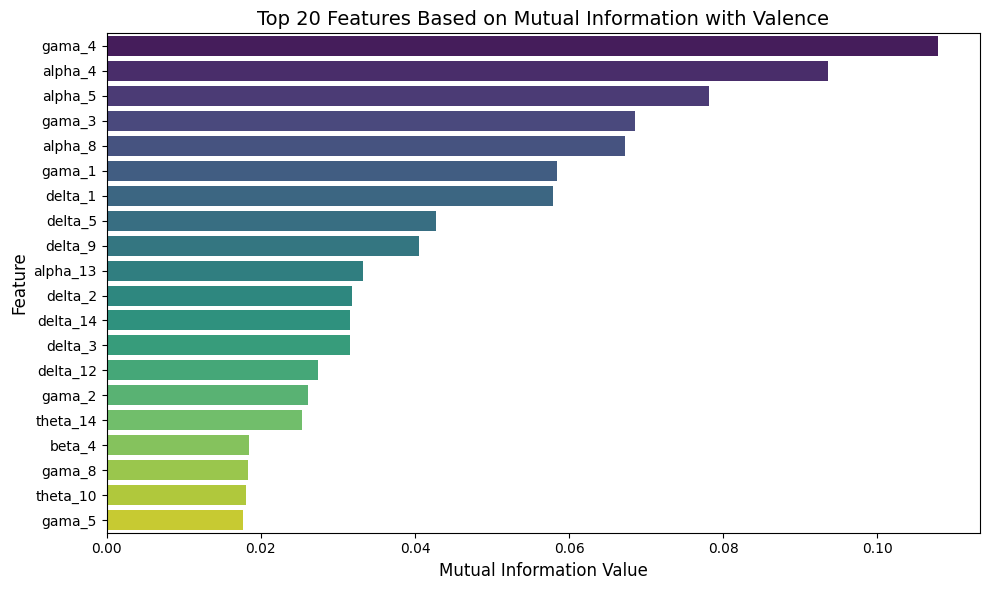

In [103]:
y = df_mldata['valence']  # Burada 'valence' seçilmiştir, 'arousal' da kullanılabilir
X = df_mldata.drop(columns=['Unnamed: 0', 'valence', 'arousal'])  # Özellik matrisi

# Mutual Information hesapla
mi_values = mutual_info_classif(X, y)

# Sonuçları DataFrame'e dönüştür ve sıralama
feature_ranking = pd.DataFrame({'Feature': X.columns, 'MI': mi_values})
feature_ranking = feature_ranking.sort_values(by='MI', ascending=False)

# En yüksek 20 özelliği seç
top_20_features = feature_ranking.head(20)

# Görselleştirme
plt.figure(figsize=(10, 6))
sns.barplot(x='MI', y='Feature', data=top_20_features, palette='viridis')

# Başlık ve etiketler
plt.title('Top 20 Features Based on Mutual Information with Valence', fontsize=14)
plt.xlabel('Mutual Information Value', fontsize=12)
plt.ylabel('Feature', fontsize=12)

# Görselleştirmeyi göster
plt.tight_layout()
plt.show()

In [113]:
# Yazılı açıklama oluşturma
print("Mutual Information Değerlerine Göre En Önemli 5 Özellik:")
for index, row in top_20_features.iterrows():
    feature_name = row['Feature']
    mi_value = row['MI']
    print(f"- Özellik: {feature_name}, Mutual Information: {mi_value:.4f}")
    if mi_value > 0.2:
        print(f"  Bu özellik, hedef değişkenle güçlü bir ilişki gösteriyor ve sınıflandırma modelinde önemli bir rol oynayabilir.")
    else:
        print(f"  Bu özellik, hedef değişkenle daha zayıf bir ilişkiye sahip olabilir ve modelde daha az etkili olabilir.")

print("\nTüm Özelliklerin Mutual Information Değerleri:")
for index, row in feature_ranking.iterrows():
    feature_name = row['Feature']
    mi_value = row['MI']
    print(f"- Özellik: {feature_name}, Mutual Information: {mi_value:.4f}")

Mutual Information Değerlerine Göre En Önemli 5 Özellik:
- Özellik: gama_4, Mutual Information: 0.1079
  Bu özellik, hedef değişkenle daha zayıf bir ilişkiye sahip olabilir ve modelde daha az etkili olabilir.
- Özellik: alpha_4, Mutual Information: 0.0935
  Bu özellik, hedef değişkenle daha zayıf bir ilişkiye sahip olabilir ve modelde daha az etkili olabilir.
- Özellik: alpha_5, Mutual Information: 0.0782
  Bu özellik, hedef değişkenle daha zayıf bir ilişkiye sahip olabilir ve modelde daha az etkili olabilir.
- Özellik: gama_3, Mutual Information: 0.0685
  Bu özellik, hedef değişkenle daha zayıf bir ilişkiye sahip olabilir ve modelde daha az etkili olabilir.
- Özellik: alpha_8, Mutual Information: 0.0672
  Bu özellik, hedef değişkenle daha zayıf bir ilişkiye sahip olabilir ve modelde daha az etkili olabilir.
- Özellik: gama_1, Mutual Information: 0.0584
  Bu özellik, hedef değişkenle daha zayıf bir ilişkiye sahip olabilir ve modelde daha az etkili olabilir.
- Özellik: delta_1, Mutual I

## MODEL

In [122]:
import pandas as pd

# Mutual Information değerlerini içeren DataFrame (top_20_features gibi)
top_20_features = pd.DataFrame({
    'Feature': ['gama_4', 'alpha_4', 'alpha_5', 'gama_3', 'alpha_8', 'gama_1', 'delta_1', 'delta_5', 'delta_9',
                'alpha_13', 'delta_2', 'delta_14', 'delta_3', 'delta_12', 'gama_2', 'theta_14', 'beta_4', 'gama_8',
                'theta_10', 'gama_5'],
    'MI': [0.1079, 0.0935, 0.0782, 0.0685, 0.0672, 0.0584, 0.0580, 0.0427, 0.0406, 0.0333, 0.0319, 0.0316,
           0.0315, 0.0274, 0.0262, 0.0254, 0.0184, 0.0183, 0.0180, 0.0177]
})

# MI değeri 0.02'den büyük olan özellikleri seçiyoruz
selected_features = top_20_features[top_20_features['MI'] > 0.02]['Feature'].tolist()

print("Seçilen Özellikler:", selected_features)


Seçilen Özellikler: ['gama_4', 'alpha_4', 'alpha_5', 'gama_3', 'alpha_8', 'gama_1', 'delta_1', 'delta_5', 'delta_9', 'alpha_13', 'delta_2', 'delta_14', 'delta_3', 'delta_12', 'gama_2', 'theta_14']


In [119]:
# Eğer hedef değişken valence ise (örneğin 'valence' olarak adlandırılmışsa)
y = df_mldata['valence']  # Hedef değişkeni df'den seçiyoruz

# veya arousal için
# y = df['arousal']  # Hedef değişkeni df'den seçiyoruz


Arousal Binary

In [132]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical


In [133]:
# Özellikler ve hedef değişkenlerin belirlenmesi
selected_features = ['gama_4', 'alpha_4', 'alpha_5', 'gama_3', 'alpha_8',
                     'gama_1', 'delta_1', 'delta_5', 'delta_9', 'alpha_13',
                     'delta_2', 'delta_14', 'delta_3', 'delta_12', 'gama_2',
                     'theta_14', 'beta_4', 'gama_8', 'theta_10', 'gama_5']  # Seçilen özellikler

X = df_mldata[selected_features]  # Seçilen özellikler
y_valence = df_mldata['valence']  # Valence hedef değişkeni
y_arousal = df_mldata['arousal']  # Arousal hedef değişkeni

In [134]:
# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train_valence, y_test_valence = train_test_split(X, y_valence, test_size=0.2, random_state=42)
_, _, y_train_arousal, y_test_arousal = train_test_split(X, y_arousal, test_size=0.2, random_state=42)

# Veriyi ölçeklendirme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [135]:
# Modelin oluşturulması
model_arousal_binary = Sequential([
    Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary sınıflandırma için sigmoid çıkışı
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [136]:
# Modeli derleme
model_arousal_binary.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Modeli eğitme
history_arousal_binary = model_arousal_binary.fit(X_train_scaled, y_train_arousal, epochs=100, batch_size=64,
                                                  validation_data=(X_test_scaled, y_test_arousal), verbose=2)

# Model Performansını Değerlendirme
y_pred_arousal = model_arousal_binary.predict(X_test_scaled)
y_pred_arousal = (y_pred_arousal > 0.5).astype(int)  # Tahminleri ikili sınıflara dönüştür

print("Arousal Binary Classification Performance:")
print(classification_report(y_test_arousal, y_pred_arousal))

Epoch 1/100
2/2 - 1s - 669ms/step - accuracy: 0.4909 - loss: 0.7031 - val_accuracy: 0.4643 - val_loss: 0.7269
Epoch 2/100
2/2 - 0s - 44ms/step - accuracy: 0.5182 - loss: 0.6857 - val_accuracy: 0.4643 - val_loss: 0.7036
Epoch 3/100
2/2 - 0s - 77ms/step - accuracy: 0.5545 - loss: 0.6796 - val_accuracy: 0.5714 - val_loss: 0.6927
Epoch 4/100
2/2 - 0s - 41ms/step - accuracy: 0.5636 - loss: 0.6808 - val_accuracy: 0.5714 - val_loss: 0.6897
Epoch 5/100
2/2 - 0s - 80ms/step - accuracy: 0.5727 - loss: 0.6755 - val_accuracy: 0.5714 - val_loss: 0.6975
Epoch 6/100
2/2 - 0s - 55ms/step - accuracy: 0.5818 - loss: 0.6683 - val_accuracy: 0.5714 - val_loss: 0.7057
Epoch 7/100
2/2 - 0s - 70ms/step - accuracy: 0.5818 - loss: 0.6649 - val_accuracy: 0.5714 - val_loss: 0.7136
Epoch 8/100
2/2 - 0s - 42ms/step - accuracy: 0.5818 - loss: 0.6649 - val_accuracy: 0.5714 - val_loss: 0.7198
Epoch 9/100
2/2 - 0s - 46ms/step - accuracy: 0.5909 - loss: 0.6621 - val_accuracy: 0.6071 - val_loss: 0.7190
Epoch 10/100
2/2 -

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Arousal Binary Classification Performance:
              precision    recall  f1-score   support

           0       0.17      0.10      0.12        10
           1       0.59      0.72      0.65        18

    accuracy                           0.50        28
   macro avg       0.38      0.41      0.39        28
weighted avg       0.44      0.50      0.46        28



Valence Binary

In [137]:
# Özellikler ve hedef değişkenlerin belirlenmesi
selected_features = ['gama_4', 'alpha_4', 'alpha_5', 'gama_3', 'alpha_8',
                     'gama_1', 'delta_1', 'delta_5', 'delta_9', 'alpha_13',
                     'delta_2', 'delta_14', 'delta_3', 'delta_12', 'gama_2',
                     'theta_14', 'beta_4', 'gama_8', 'theta_10', 'gama_5']  # Seçilen özellikler

X = df_mldata[selected_features]  # Seçilen özellikler
y_valence = df_mldata['valence']  # Valence hedef değişkeni

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train_valence, y_test_valence = train_test_split(X, y_valence, test_size=0.2, random_state=42)

# Veriyi ölçeklendirme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [138]:
# **Valence için Binary Classification Modeli**

# Modelin oluşturulması
model_valence_binary = Sequential([
    Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary sınıflandırma için sigmoid çıkışı
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [139]:
# Modeli derleme
model_valence_binary.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Modeli eğitme
history_valence_binary = model_valence_binary.fit(X_train_scaled, y_train_valence, epochs=100, batch_size=64,
                                                  validation_data=(X_test_scaled, y_test_valence), verbose=2)

# **Model Performansını Değerlendirme**
y_pred_valence = model_valence_binary.predict(X_test_scaled)
y_pred_valence = (y_pred_valence > 0.5).astype(int)  # Tahminleri ikili sınıflara dönüştür

print("Valence Binary Classification Performance:")
print(classification_report(y_test_valence, y_pred_valence))

Epoch 1/100
2/2 - 2s - 1s/step - accuracy: 0.5091 - loss: 0.7136 - val_accuracy: 0.6071 - val_loss: 0.6930
Epoch 2/100
2/2 - 0s - 48ms/step - accuracy: 0.5182 - loss: 0.6995 - val_accuracy: 0.6429 - val_loss: 0.6893
Epoch 3/100
2/2 - 0s - 72ms/step - accuracy: 0.5091 - loss: 0.6931 - val_accuracy: 0.6071 - val_loss: 0.6884
Epoch 4/100
2/2 - 0s - 43ms/step - accuracy: 0.5000 - loss: 0.6873 - val_accuracy: 0.6071 - val_loss: 0.6894
Epoch 5/100
2/2 - 0s - 74ms/step - accuracy: 0.5182 - loss: 0.6848 - val_accuracy: 0.5714 - val_loss: 0.6916
Epoch 6/100
2/2 - 0s - 53ms/step - accuracy: 0.4818 - loss: 0.6813 - val_accuracy: 0.5714 - val_loss: 0.6972
Epoch 7/100
2/2 - 0s - 67ms/step - accuracy: 0.5091 - loss: 0.6784 - val_accuracy: 0.5357 - val_loss: 0.7039
Epoch 8/100
2/2 - 0s - 47ms/step - accuracy: 0.5455 - loss: 0.6747 - val_accuracy: 0.5357 - val_loss: 0.7114
Epoch 9/100
2/2 - 0s - 71ms/step - accuracy: 0.5545 - loss: 0.6718 - val_accuracy: 0.5000 - val_loss: 0.7190
Epoch 10/100
2/2 - 0s

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Valence Binary Classification Performance:
              precision    recall  f1-score   support

           0       0.36      0.45      0.40        11
           1       0.57      0.47      0.52        17

    accuracy                           0.46        28
   macro avg       0.46      0.46      0.46        28
weighted avg       0.49      0.46      0.47        28



MultiClass Model

In [150]:
# 3'lü sınıf deneme, 70% oldu sonucu

# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import classification_report
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.utils import to_categorical

# # Özellikler ve hedef değişkenlerin belirlenmesi
# selected_features = ['gama_4', 'alpha_4', 'alpha_5', 'gama_3', 'alpha_8',
#                      'gama_1', 'delta_1', 'delta_5', 'delta_9', 'alpha_13',
#                      'delta_2', 'delta_14', 'delta_3', 'delta_12', 'gama_2',
#                      'theta_14', 'beta_4', 'gama_8', 'theta_10', 'gama_5']  # Seçilen özellikler

# X = df_mldata[selected_features]  # Seçilen özellikler
# y_valence = df_mldata['valence']  # Valence hedef değişkeni
# y_arousal = df_mldata['arousal']  # Arousal hedef değişkeni

# # Veriyi eğitim ve test setlerine ayırma
# X_train, X_test, y_train_valence, y_test_valence = train_test_split(X, y_valence, test_size=0.2, random_state=42)
# _, _, y_train_arousal, y_test_arousal = train_test_split(X, y_arousal, test_size=0.2, random_state=42)

# # Veriyi ölçeklendirme
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # **Multiclass Classification Model (Valence için)**

# # Valence hedef değişkenini kategorik hale getirme
# y_train_valence = to_categorical(y_train_valence, num_classes=3)  # 3 sınıf örneği (örneğin: düşük, orta, yüksek)
# y_test_valence = to_categorical(y_test_valence, num_classes=3)

# # Modelin oluşturulması
# model_valence = Sequential([
#     Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]),
#     Dense(32, activation='relu'),
#     Dense(3, activation='softmax')  # Çoklu sınıf için softmax çıkışı
# ])

# # Modeli derleme
# model_valence.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # Modeli eğitme
# history_valence = model_valence.fit(X_train_scaled, y_train_valence, epochs=100, batch_size=64,
#                                     validation_data=(X_test_scaled, y_test_valence), verbose=2)

# # **Model Performansını Değerlendirme (Valence)**
# y_pred_valence = model_valence.predict(X_test_scaled)
# y_pred_valence = y_pred_valence.argmax(axis=1)  # Tahminlerin sınıfını seçme

# # Gerçek ve tahmin edilen sınıflar arasında karşılaştırma
# print("Valence Multiclass Classification Performance:")
# print(classification_report(y_test_valence.argmax(axis=1), y_pred_valence))

# # **Multiclass Classification Model (Arousal için)**

# # Arousal hedef değişkenini kategorik hale getirme
# y_train_arousal = to_categorical(y_train_arousal, num_classes=3)  # 3 sınıf örneği
# y_test_arousal = to_categorical(y_test_arousal, num_classes=3)

# # Modelin oluşturulması
# model_arousal = Sequential([
#     Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]),
#     Dense(32, activation='relu'),
#     Dense(3, activation='softmax')  # Çoklu sınıf için softmax çıkışı
# ])

# # Modeli derleme
# model_arousal.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # Modeli eğitme
# history_arousal = model_arousal.fit(X_train_scaled, y_train_arousal, epochs=100, batch_size=64,
#                                     validation_data=(X_test_scaled, y_test_arousal), verbose=2)

# # **Model Performansını Değerlendirme (Arousal)**
# y_pred_arousal = model_arousal.predict(X_test_scaled)
# y_pred_arousal = y_pred_arousal.argmax(axis=1)  # Tahminlerin sınıfını seçme

# # Gerçek ve tahmin edilen sınıflar arasında karşılaştırma
# print("Arousal Multiclass Classification Performance:")
# print(classification_report(y_test_arousal.argmax(axis=1), y_pred_arousal))


In [156]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [160]:
# Özellikler ve hedef değişkenlerin belirlenmesi
selected_features = ['gama_4', 'alpha_4', 'alpha_5', 'gama_3', 'alpha_8',
                     'gama_1', 'delta_1', 'delta_5', 'delta_9', 'alpha_13',
                     'delta_2', 'delta_14', 'delta_3', 'delta_12', 'gama_2',
                     'theta_14', 'beta_4', 'gama_8', 'theta_10', 'gama_5']  # Seçilen özellikler

X = df_mldata[selected_features]  # Seçilen özellikler
y_valence = df_mldata['valence']  # Valence hedef değişkeni
y_arousal = df_mldata['arousal']  # Arousal hedef değişkeni

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train_valence, y_test_valence = train_test_split(X, y_valence, test_size=0.2, random_state=42)
_, _, y_train_arousal, y_test_arousal = train_test_split(X, y_arousal, test_size=0.2, random_state=42)

# Veriyi ölçeklendirme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Valence

In [161]:
# **4 Sınıflı Classification Model (Valence için)**

# Valence hedef değişkenini kategorik hale getirme (4 sınıf)
y_train_valence = to_categorical(y_train_valence, num_classes=4)  # 4 sınıf örneği
y_test_valence = to_categorical(y_test_valence, num_classes=4)

In [162]:
# Modelin oluşturulması
model_valence = Sequential([
    Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]),
    Dense(32, activation='relu'),
    Dense(4, activation='softmax')  # 4 sınıf için softmax çıkışı
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [163]:
# Modeli derleme
model_valence.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Modeli eğitme
history_valence = model_valence.fit(X_train_scaled, y_train_valence, epochs=100, batch_size=64,
                                    validation_data=(X_test_scaled, y_test_valence), verbose=2)

# **Model Performansını Değerlendirme (Valence)**
y_pred_valence = model_valence.predict(X_test_scaled)
y_pred_valence = y_pred_valence.argmax(axis=1)  # Tahminlerin sınıfını seçme

# Gerçek ve tahmin edilen sınıflar arasında karşılaştırma
print("Valence 4-class Classification Performance:")
print(classification_report(y_test_valence.argmax(axis=1), y_pred_valence))

Epoch 1/100
2/2 - 2s - 874ms/step - accuracy: 0.0727 - loss: 1.4968 - val_accuracy: 0.2143 - val_loss: 1.5211
Epoch 2/100
2/2 - 0s - 57ms/step - accuracy: 0.2909 - loss: 1.4289 - val_accuracy: 0.3571 - val_loss: 1.4613
Epoch 3/100
2/2 - 0s - 30ms/step - accuracy: 0.4636 - loss: 1.3768 - val_accuracy: 0.4286 - val_loss: 1.4109
Epoch 4/100
2/2 - 0s - 29ms/step - accuracy: 0.5182 - loss: 1.3368 - val_accuracy: 0.4286 - val_loss: 1.3643
Epoch 5/100
2/2 - 0s - 43ms/step - accuracy: 0.5364 - loss: 1.3022 - val_accuracy: 0.3929 - val_loss: 1.3211
Epoch 6/100
2/2 - 0s - 57ms/step - accuracy: 0.5273 - loss: 1.2668 - val_accuracy: 0.3929 - val_loss: 1.2857
Epoch 7/100
2/2 - 0s - 50ms/step - accuracy: 0.5364 - loss: 1.2441 - val_accuracy: 0.4286 - val_loss: 1.2552
Epoch 8/100
2/2 - 0s - 61ms/step - accuracy: 0.5364 - loss: 1.2239 - val_accuracy: 0.3929 - val_loss: 1.2329
Epoch 9/100
2/2 - 0s - 58ms/step - accuracy: 0.5364 - loss: 1.2057 - val_accuracy: 0.3929 - val_loss: 1.2148
Epoch 10/100
2/2 -

Arousal

In [164]:
# **4 Sınıflı Classification Model (Arousal için)**

# Arousal hedef değişkenini kategorik hale getirme (4 sınıf)
y_train_arousal = to_categorical(y_train_arousal, num_classes=4)  # 4 sınıf örneği
y_test_arousal = to_categorical(y_test_arousal, num_classes=4)

# Modelin oluşturulması
model_arousal = Sequential([
    Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]),
    Dense(32, activation='relu'),
    Dense(4, activation='softmax')  # 4 sınıf için softmax çıkışı
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [165]:
# Modeli derleme
model_arousal.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Modeli eğitme
history_arousal = model_arousal.fit(X_train_scaled, y_train_arousal, epochs=100, batch_size=64,
                                    validation_data=(X_test_scaled, y_test_arousal), verbose=2)

# **Model Performansını Değerlendirme (Arousal)**
y_pred_arousal = model_arousal.predict(X_test_scaled)
y_pred_arousal = y_pred_arousal.argmax(axis=1)  # Tahminlerin sınıfını seçme

# Gerçek ve tahmin edilen sınıflar arasında karşılaştırma
print("Arousal 4-class Classification Performance:")
print(classification_report(y_test_arousal.argmax(axis=1), y_pred_arousal))

Epoch 1/100
2/2 - 3s - 2s/step - accuracy: 0.5364 - loss: 1.3998 - val_accuracy: 0.5357 - val_loss: 1.3621
Epoch 2/100
2/2 - 0s - 45ms/step - accuracy: 0.5364 - loss: 1.3375 - val_accuracy: 0.5357 - val_loss: 1.3118
Epoch 3/100
2/2 - 0s - 122ms/step - accuracy: 0.5455 - loss: 1.2854 - val_accuracy: 0.6071 - val_loss: 1.2713
Epoch 4/100
2/2 - 0s - 125ms/step - accuracy: 0.5636 - loss: 1.2391 - val_accuracy: 0.6071 - val_loss: 1.2354
Epoch 5/100
2/2 - 0s - 31ms/step - accuracy: 0.5727 - loss: 1.2039 - val_accuracy: 0.6071 - val_loss: 1.2050
Epoch 6/100
2/2 - 0s - 33ms/step - accuracy: 0.5727 - loss: 1.1701 - val_accuracy: 0.6071 - val_loss: 1.1771
Epoch 7/100
2/2 - 0s - 32ms/step - accuracy: 0.5909 - loss: 1.1389 - val_accuracy: 0.6071 - val_loss: 1.1524
Epoch 8/100
2/2 - 0s - 29ms/step - accuracy: 0.5909 - loss: 1.1082 - val_accuracy: 0.6071 - val_loss: 1.1299
Epoch 9/100
2/2 - 0s - 78ms/step - accuracy: 0.5909 - loss: 1.0817 - val_accuracy: 0.6071 - val_loss: 1.1102
Epoch 10/100
2/2 - 

In [167]:
# kodların hepsini bir araya topladım, bu yaklaşımda ise %63 civarı doğruluk çıkıyordu.

# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import classification_report
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.utils import to_categorical

# # Özellikler ve hedef değişkenlerin belirlenmesi
# selected_features = ['gama_4', 'alpha_4', 'alpha_5', 'gama_3', 'alpha_8',
#                      'gama_1', 'delta_1', 'delta_5', 'delta_9', 'alpha_13',
#                      'delta_2', 'delta_14', 'delta_3', 'delta_12', 'gama_2',
#                      'theta_14', 'beta_4', 'gama_8', 'theta_10', 'gama_5']  # Seçilen özellikler

# X = df_mldata[selected_features]  # Seçilen özellikler
# y_valence = df_mldata['valence']  # Valence hedef değişkeni
# y_arousal = df_mldata['arousal']  # Arousal hedef değişkeni

# # Veriyi eğitim ve test setlerine ayırma
# X_train, X_test, y_train_valence, y_test_valence = train_test_split(X, y_valence, test_size=0.2, random_state=42)
# _, _, y_train_arousal, y_test_arousal = train_test_split(X, y_arousal, test_size=0.2, random_state=42)

# # Eğitim ve test setlerinin boyutları hakkında bilgi
# print(f"Eğitim Seti Boyutu: {X_train.shape[0]} örnek")
# print(f"Test Seti Boyutu: {X_test.shape[0]} örnek")

# # Veriyi ölçeklendirme
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # **4 Sınıflı Classification Model (Valence için)**

# # Valence hedef değişkenini kategorik hale getirme (4 sınıf)
# y_train_valence = to_categorical(y_train_valence, num_classes=4)  # 4 sınıf örneği
# y_test_valence = to_categorical(y_test_valence, num_classes=4)

# # Modelin oluşturulması
# model_valence = Sequential([
#     Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]),
#     Dense(32, activation='relu'),
#     Dense(4, activation='softmax')  # 4 sınıf için softmax çıkışı
# ])

# # Modeli derleme
# model_valence.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # Modeli eğitme
# history_valence = model_valence.fit(X_train_scaled, y_train_valence, epochs=100, batch_size=64,
#                                     validation_data=(X_test_scaled, y_test_valence), verbose=2)

# # Eğitim ve test seti doğruluk ve kaybı
# train_loss_valence, train_accuracy_valence = model_valence.evaluate(X_train_scaled, y_train_valence, verbose=0)
# test_loss_valence, test_accuracy_valence = model_valence.evaluate(X_test_scaled, y_test_valence, verbose=0)

# print("\n**Valence 4-class Classification Performance**")
# print(f"Train Accuracy: {train_accuracy_valence:.4f}")
# print(f"Train Loss: {train_loss_valence:.4f}")
# print(f"Test Accuracy: {test_accuracy_valence:.4f}")
# print(f"Test Loss: {test_loss_valence:.4f}")

# # **Model Performansını Değerlendirme (Valence)**
# y_pred_valence = model_valence.predict(X_test_scaled)
# y_pred_valence = y_pred_valence.argmax(axis=1)  # Tahminlerin sınıfını seçme

# # Gerçek ve tahmin edilen sınıflar arasında karşılaştırma
# print("Valence 4-class Classification Performance (classification_report):")
# print(classification_report(y_test_valence.argmax(axis=1), y_pred_valence))

# # **4 Sınıflı Classification Model (Arousal için)**

# # Arousal hedef değişkenini kategorik hale getirme (4 sınıf)
# y_train_arousal = to_categorical(y_train_arousal, num_classes=4)  # 4 sınıf örneği
# y_test_arousal = to_categorical(y_test_arousal, num_classes=4)

# # Modelin oluşturulması
# model_arousal = Sequential([
#     Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]),
#     Dense(32, activation='relu'),
#     Dense(4, activation='softmax')  # 4 sınıf için softmax çıkışı
# ])

# # Modeli derleme
# model_arousal.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # Modeli eğitme
# history_arousal = model_arousal.fit(X_train_scaled, y_train_arousal, epochs=100, batch_size=64,
#                                     validation_data=(X_test_scaled, y_test_arousal), verbose=2)

# # Eğitim ve test seti doğruluk ve kaybı
# train_loss_arousal, train_accuracy_arousal = model_arousal.evaluate(X_train_scaled, y_train_arousal, verbose=0)
# test_loss_arousal, test_accuracy_arousal = model_arousal.evaluate(X_test_scaled, y_test_arousal, verbose=0)

# print("\n**Arousal 4-class Classification Performance**")
# print(f"Train Accuracy: {train_accuracy_arousal:.4f}")
# print(f"Train Loss: {train_loss_arousal:.4f}")
# print(f"Test Accuracy: {test_accuracy_arousal:.4f}")
# print(f"Test Loss: {test_loss_arousal:.4f}")

# # **Model Performansını Değerlendirme (Arousal)**
# y_pred_arousal = model_arousal.predict(X_test_scaled)
# y_pred_arousal = y_pred_arousal.argmax(axis=1)  # Tahminlerin sınıfını seçme

# # Gerçek ve tahmin edilen sınıflar arasında karşılaştırma
# print("Arousal 4-class Classification Performance (classification_report):")
# print(classification_report(y_test_arousal.argmax(axis=1), y_pred_arousal))
